# Importando as Bibliotecas

In [55]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.figure_factory as ff


# Acessando os arquivos

In [56]:
# VENDORS

tb5 = pd.read_csv(r'C:\Users\Rodrigo Viannini\OneDrive\Documentos\MeusProjetos\meus_Primeiros_ Projetos\Hackathons\Hackathons\Nestle\Dados_Tratados\tb_vendors_treatment.csv')

tb5.head(3)

,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,hora_abertura,hora_fechamento
0,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,05:30,19:00
1,5f584189fc58110021464422,Moça Doceria,2020-09-09 01:56:25,0,0,0,False,BUSTLU BRRSIL LTDR.,5f584189fc58110021464423,13,08:00,18:00
2,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,08:00,19:00


In [57]:
# ADDRESSES
tb1 = pd.read_csv(r'C:\Users\Rodrigo Viannini\OneDrive\Documentos\MeusProjetos\meus_Primeiros_ Projetos\Hackathons\Hackathons\Nestle\Dados_Tratados\tb_addresses_treatment.csv')

tb1.head(3)

,id_endereco,bairro,cidade,estado,uf,pais,tipo,cep
0,6158e903c044d80022ae40b9,Conjunto Adalberto Sena,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
1,615b312b53c10b002275d928,Nova Estacao,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
2,60c2de7e52f4f30021f53891,Terminal Cadeia Velha,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0


In [58]:
# PRODUCTS
tb13 = pd.read_csv(r'C:\Users\Rodrigo Viannini\OneDrive\Documentos\MeusProjetos\meus_Primeiros_ Projetos\Hackathons\Hackathons\Nestle\Dados_Tratados\tb_products_treatment.csv')

tb13.head(3)

,id_produto,id_fornecedor,id_tipo,nome,ativo,aprovado,arquivado,entregavel,recuperavel,tempo_preparacao_minutos,avaliacao_media
0,5f550676cba01d00210ed018,5f550609cba01d00210ed015,5f518a26a4a5fbed86099757,Bolo de cenoura teste,True,False,False,True,False,1980.0,0.0
1,5f5ea709a4944c00215bc67f,5f550609cba01d00210ed015,5f518a26a4a5fbed86099757,Bolo de cenoura e chocolate,True,False,False,True,True,0.0,0.0
2,5f60221d70be91002137eb61,5f601c9d70be91002137eb5c,5f518a26a4a5fbed86099757,Bolo de leite ninho com morangos,False,False,True,True,True,1569.0,0.0


# Tratamento dos dados

In [59]:
## Usei o 'tb_products_treatment.csv'
# Filtrei para obter apenas os produtos aprovados
# Filtrei para obter apenas os produtos que podem ser entregáveis

tb13 = tb13[tb13['aprovado'] == True]
tb13 = tb13[tb13['entregavel'] == True]
tb13.shape

(1995, 11)

In [60]:
## Usei o 'tb_vendors_treatment.csv'
# Filtrei para obter apenas as vendedores aprovados

tb5 = tb5[tb5['e_aprovado'] == True]
tb5.head(2)

,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,hora_abertura,hora_fechamento
2,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,08:00,19:00
3,5f5bc310b8742200213bda1d,Re doces,2020-09-11 01:07:10,0,0,0,True,Rdysts Cury Mwchslsyy,5f5bc310b8742200213bda1e,15,10:00,17:00


In [61]:
## Concatenei vendedores e produtos
df_vendors_products = pd.merge(tb5, tb13)
df_vendors_products.head(2)

C:\Users\Rodrigo Viannini\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:1213: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,...,hora_fechamento,id_produto,id_tipo,nome,ativo,aprovado,arquivado,entregavel,recuperavel,tempo_preparacao_minutos
0,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,...,19:00,5fabe7254d36ff0021e3a14e,5f518a49a4a5fbed86099759,Brigadeiro prestígio,True,True,False,True,True,1671.0
1,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,...,19:00,5fabe8714d36ff0021e3a5b3,5f518a49a4a5fbed86099759,Brigadeiro tradiconal,True,True,False,True,True,1695.0


In [62]:
## Usei o 'tb_addresses_treatment.csv'
# Filtrei para obter dados da cidade que pré-determinamos
tb1 = tb1[tb1['cidade'] == 'São Paulo']
tb1.head(2)

,id_endereco,bairro,cidade,estado,uf,pais,tipo,cep
96,61421da6c6638d0022d9565d,Indianópolis,São Paulo,São Paulo,SP,Brasil,HOME,45160000.0
99,6165c6fcc1fbab0022f398e3,Vila Nair,São Paulo,São Paulo,SP,Brasil,HISTORY,42800001.0


In [63]:
## Concatenei vendedores e produtos com endereços
# assim temos em um dataframe somente produtos e vendedores aprovados na cidade de São Paulo e;
# com os id_endereco de vendedores e endereços ordenados?
df_vendors_products_addresses = pd.merge(df_vendors_products, tb1)
df_vendors_products_addresses.head(2)

,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,...,entregavel,recuperavel,tempo_preparacao_minutos,bairro,cidade,estado,uf,pais,tipo,cep
0,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,...,True,True,1671.0,Brooklin,São Paulo,São Paulo,SP,Brasil,OFFICE,1000001.0
1,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,...,True,True,1695.0,Brooklin,São Paulo,São Paulo,SP,Brasil,OFFICE,1000001.0


In [64]:
# Faz sentido com a quantidade de empresas ativas segundo as Lives
len(df_vendors_products_addresses['nome_empresa'].unique())

105

In [65]:
# Valores que aparecem nos dados referentes ao raio de entrega
df_vendors_products_addresses['delivery_raio_km'].unique()

array([15, 38, 20, 12,  6, 30, 50,  5, 40, 25, 10,  1,  7, 16, 19,  8, 13,
        3, 22,  2, 18,  4], dtype=int64)

In [66]:
# Não temos dados referentes a pontuação das avaliações
df_vendors_products_addresses['avaliacao_media'].unique()

array([0], dtype=int64)

In [67]:
# Quantidade de linhas que deram matches entre vendedores x produtos x endereços
df_vendors_products_addresses.shape[0]

1680

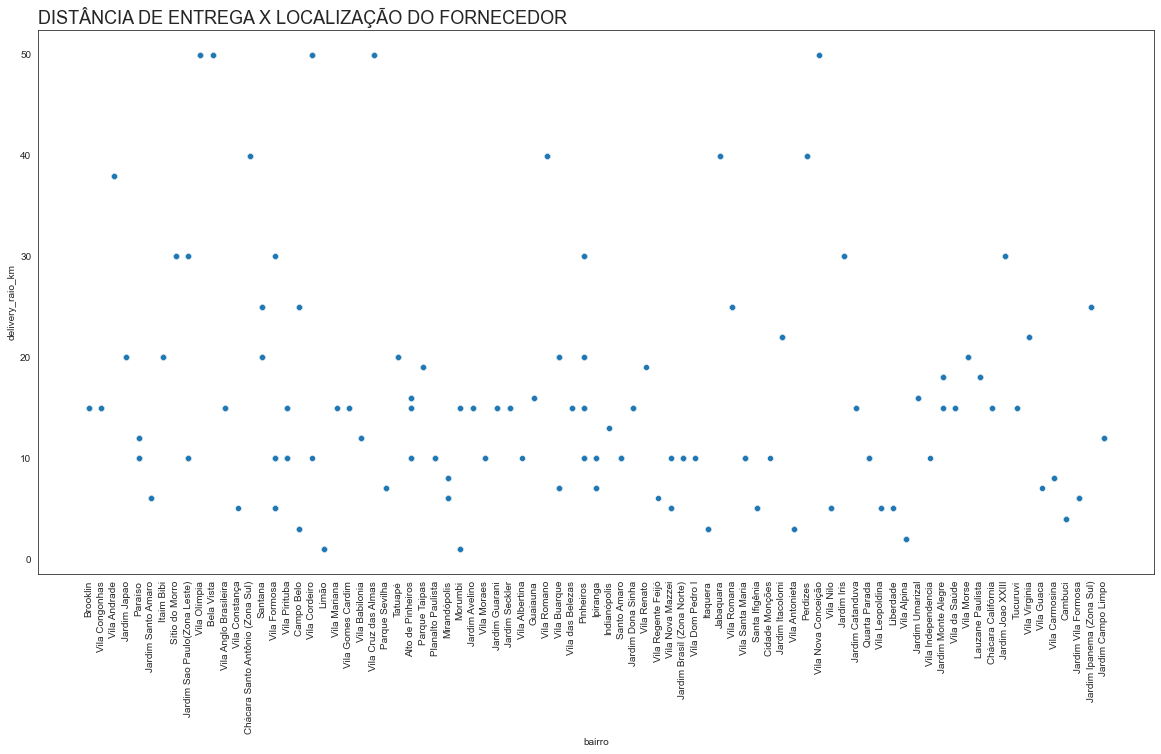

In [68]:
# ENTENDENDO A DISPERSÃO DOS BAIRROS X RAIO DE ENTREGA
sns.set_style("white")
plt.figure(figsize=(20, 10))
plt.title('DISTÂNCIA DE ENTREGA X LOCALIZAÇÃO DO FORNECEDOR', loc='left',fontsize=18 )

g = sns.scatterplot(x="bairro", y="delivery_raio_km", 
                    data=df_vendors_products_addresses)
plt.yticks()
plt.xticks(rotation=90);
plt.show();

## Problema...

- Aqui surgiu um problema, não conseguimos co-relacionar os endereços para determinar os locais aproximados onde se encontram cada vendedor, pois os CEPs não correspondem aos bairros;
- Nossa análise será realizada apenas pela cidade de São Paulo que apresentam os dados mais consistentes;
- Nosso objetivo é criar um mapa com o nome dos vendedores, endereço aproximado e raio de entrega;
- Utilizamos um DataSet auxiliar retirado do KAGGLE apenas para coletar os valores de latitude e longitude.

In [69]:
df_kaggle = pd.read_csv(r'C:\Users\Rodrigo Viannini\OneDrive\Documentos\MeusProjetos\meus_Primeiros_ Projetos\Hackathons\Hackathons\Nestle\Dados_Tratados\dataset-limpo.csv')
df_kaggle.head(0)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time


In [70]:
# SELECIONANDO APENAS AS COLUNAS QUE DESEJAMOS EXTRAIR OS DADOS
df_kaggle_sp = pd.DataFrame(df_kaggle, columns=['bairro', 'latitude', 'longitude'])
df_kaggle_sp.shape

(12899, 3)

In [71]:
# APAGANDO VALORES DUPLICADOS
df_kaggle_sp.drop_duplicates(subset=['bairro'], inplace=True)
df_kaggle_sp.shape

(1578, 3)

In [72]:
teste = df_kaggle_sp['bairro'].unique().tolist()
teste

['Butantã',
 'Itaquera',
 'Morumbi',
 'Alto de Pinheiros',
 'Sumaré',
 'Vila Mariana',
 'Barra Funda',
 'Santana',
 nan,
 'Itaim Paulista',
 'Brás',
 'Vila Nova Parada',
 'Bela Vista',
 'Perus',
 'Parque do Lago',
 'Cambuci',
 'Belém',
 'Ipiranga',
 'Vila Nova Conceição',
 'Saúde',
 'Parque Independencia',
 'São Paulo',
 'Campo Belo',
 'Coqueiro',
 'Itaim Bibi',
 'República',
 'Sé',
 'Jurubatuba',
 'Cachoeirinha',
 'Parque Taipas',
 'Centro',
 'Jardim Vila Formosa',
 'Vila Andrade',
 'Mooca',
 'Jaguare',
 'Perdizes',
 'Vila Matilde',
 'Jardim Paulista',
 'Vila São Luís(Zona Oeste)',
 'Consolação',
 'Jabaquara',
 'Rio Pequeno',
 'Raposo Tavares',
 'Paraíso',
 'Heliópolis',
 'Sacomã',
 'Luz',
 'Socorro',
 'Grajau',
 'Sítio do Piqueri',
 'Santo Amaro',
 'Liberdade',
 'Jardim América',
 'Vila Ivg',
 'Vila das Belezas',
 'Brooklin',
 'Jardim Satelite',
 'Cidade Ademar',
 'Vila Medeiros',
 'Campo Grande',
 'Jaguaré',
 'Vila Lageado',
 'Vila Maria',
 'Moema',
 'Ermelino Matarazzo',
 'Vila Ind

In [73]:
# FILTRANDO O DATA FRAME
df_vendors_products_addresses_filtrado = pd.DataFrame(df_vendors_products_addresses, columns=['nome_fornecedor', 'nome_empresa', 
                                                                 'e_aprovado', 'nome', 'delivery_raio_km',
                                                                 'bairro', 'cidade', 'estado',
                                                                 'uf', 'tipo'])

In [74]:
df_vendors_products_addresses_filtrado.head(2)

,nome_fornecedor,nome_empresa,e_aprovado,nome,delivery_raio_km,bairro,cidade,estado,uf,tipo
0,Cami's Candy,Csmws Csydy,True,Brigadeiro prestígio,15,Brooklin,São Paulo,São Paulo,SP,OFFICE
1,Cami's Candy,Csmws Csydy,True,Brigadeiro tradiconal,15,Brooklin,São Paulo,São Paulo,SP,OFFICE


In [75]:
# UNINDO O DATA FRAME FILTRADO COM O AUXILIAR
df_nestle = pd.merge(df_vendors_products_addresses_filtrado, df_kaggle_sp, how='left', on='bairro')

In [76]:
# AGORA TEMOS OS VALORES PARA CORRELACIONAR OS VENDEDORES, ENDEREÇOS E DADOS DE GEOLOCALIZAÇÃO
df_nestle.head(2)

,nome_fornecedor,nome_empresa,e_aprovado,nome,delivery_raio_km,bairro,cidade,estado,uf,tipo,latitude,longitude
0,Cami's Candy,Csmws Csydy,True,Brigadeiro prestígio,15,Brooklin,São Paulo,São Paulo,SP,OFFICE,-23.609707,-46.692418
1,Cami's Candy,Csmws Csydy,True,Brigadeiro tradiconal,15,Brooklin,São Paulo,São Paulo,SP,OFFICE,-23.609707,-46.692418


In [77]:
# VALORES AUSENTES
latitude_ausente = df_nestle[df_nestle['latitude'].isnull()]
latitude_ausente.shape

(188, 12)

In [78]:
# VALORES AUSENTES
longitude_ausente = df_nestle[df_nestle['longitude'].isnull()]
longitude_ausente.shape

(188, 12)

In [79]:
latitude_ausente['bairro'].unique()

array(['Jardim Sao Paulo(Zona Leste)', 'Chácara Santo Antônio (Zona Sul)',
       'Parque Sevilha', 'Jardim Guarani', 'Guaiauna', 'Vila Romano',
       'Vila Santa Maria', 'Jardim Joao XXIII', 'Vila Virginia'],
      dtype=object)

In [80]:
# fig = px.density_mapbox(df_nestle, lat='latitude', lon='longitude', radius=5, zoom=10, 
# mapbox_style="stamen-terrain", hover_name= 'nome_fornecedor',z='delivery_raio_km',)

# fig.update_layout(title = 'Regiões Vem de Bolo',)

# fig.show()

In [81]:
df_nestle.describe()

,delivery_raio_km,latitude,longitude
count,1680.000000,1492.000000,1492.000000
mean,22.795833,-23.570658,-46.662453
std,14.831854,0.060373,0.053620
min,1.000000,-23.690683,-46.766134
25%,10.000000,-23.617604,-46.699006
50%,20.000000,-23.574957,-46.663319
75%,30.000000,-23.541009,-46.639283
max,50.000000,-23.414015,-46.462872


In [82]:
# COGNATIS
df_cognatis = pd.read_csv(r'C:\Users\Rodrigo Viannini\OneDrive\Documentos\MeusProjetos\meus_Primeiros_ Projetos\Hackathons\Hackathons\Nestle\Dados_Tratados\tb_solds_cognatis_treatment.csv')
df_cognatis.head(2)

,SETOR_ATIV,UF,MUNICIPIO,CEP,TRABALHADORES,S_RENDA_MEDIA,S_FLUXO_PEDESTRE,S_FLUXO_VEICULOS,S_POP_TOTAL,S_DOM_PART_PERM,...,S_DE_50_99_FUNC,S_DE_100_249_FUNC,S_DE_250_499_FUNC,S_DE_500_999_FUNC,S_MAIS1000_FUNC,S_SUPERMERCADO,S_TT_PADARIA,S_ATACADO,S_HIPERMERCADO,S_MINIMERCADO
0,NaN,AC,Rio Branco,69900001.0,13125.0,3502.669922,4.0,6.0,53376.0,17146.0,...,15.0,15.0,3.0,4.0,2.0,3.0,22.0,3.0,9.0,184.0
1,NaN,AC,Rio Branco,69900001.0,18364.0,2477.159912,4.0,6.0,73460.0,24698.0,...,19.0,19.0,6.0,2.0,2.0,14.0,29.0,27.0,9.0,111.0


In [83]:
# COGNATIS - SP
df_cognatis_sp = df_cognatis[df_cognatis['MUNICIPIO'] == 'SAO PAULO']
df_cognatis_sp.head(2)

,SETOR_ATIV,UF,MUNICIPIO,CEP,TRABALHADORES,S_RENDA_MEDIA,S_FLUXO_PEDESTRE,S_FLUXO_VEICULOS,S_POP_TOTAL,S_DOM_PART_PERM,...,S_DE_50_99_FUNC,S_DE_100_249_FUNC,S_DE_250_499_FUNC,S_DE_500_999_FUNC,S_MAIS1000_FUNC,S_SUPERMERCADO,S_TT_PADARIA,S_ATACADO,S_HIPERMERCADO,S_MINIMERCADO
4871,AGROPECUARIA,SP,SAO PAULO,49400000.0,8889.0,1787.380005,4.0,6.0,158260.0,53622.0,...,7.0,1.0,1.0,1.0,2.0,12.0,162.0,16.0,2.0,297.0
4872,AGROPECUARIA,SP,SAO PAULO,55290001.0,17338.0,1712.239990,4.0,6.0,105274.0,36930.0,...,24.0,23.0,4.0,4.0,1.0,9.0,103.0,35.0,2.0,86.0


In [84]:
# FILTRANDO O DATA FRAME COGNATIS_SP
df_cognatis_sp_filter = pd.DataFrame(df_cognatis_sp, columns=['CEP', 'TRABALHADORES', 'S_POP_TOTAL',
                                                              'S_PCT_CLASSE_A', 'S_PCT_CLASSE_B', 'S_PCT_CLASSE_C', 
                                                              'S_PCT_JOVENS', 'S_PCT_ADULTOS', 'S_PCT_SENIOR', 'S_PCT_IDOSOS', 'S_RENDA_MEDIA'])

In [85]:
df_cognatis_sp_filter.head(2)

,CEP,TRABALHADORES,S_POP_TOTAL,S_PCT_CLASSE_A,S_PCT_CLASSE_B,S_PCT_CLASSE_C,S_PCT_JOVENS,S_PCT_ADULTOS,S_PCT_SENIOR,S_PCT_IDOSOS,S_RENDA_MEDIA
4871,49400000.0,8889.0,158260.0,0.04,17.91,63.410000,16.290001,33.970001,14.140000,5.33,1787.380005
4872,55290001.0,17338.0,105274.0,4.26,45.82,41.900002,15.680000,33.250000,18.040001,9.43,1712.239990


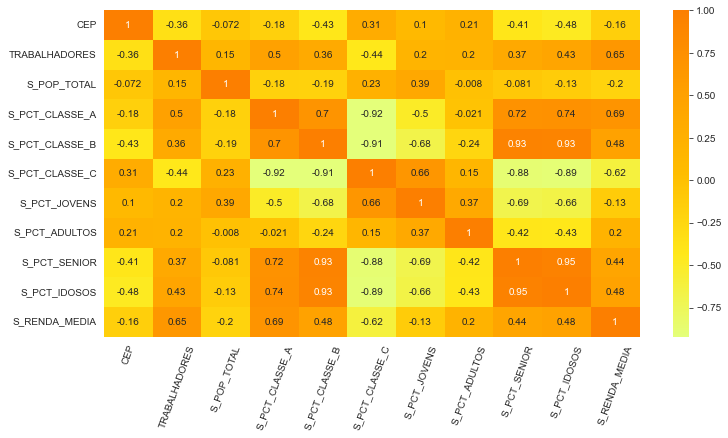

In [86]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cognatis_sp_filter.corr(), annot=True, cmap='Wistia',)
plt.xticks(rotation=70)
plt.show()

In [87]:
# QTDE DE VENDEDORES EM SP
df_vendors_products_addresses['cidade'].value_counts()

São Paulo    1680
Name: cidade, dtype: int64

In [88]:
df_vendedores = pd.DataFrame(df_vendors_products_addresses, columns=[ 
                             'nome_fornecedor', 'data_registro', 
                             'hora_abertura','hora_fechamento',
                             'delivery_raio_km', 'tempo_preparacao_minutos', 'bairro',
                             'cidade', 'tipo'])

In [89]:
# PERCENTUAL DE TIPOS DE VENDEDORES
df_vendedores['tipo'].value_counts(True) *100

OFFICE     99.22619
HISTORY     0.77381
Name: tipo, dtype: float64

In [90]:
# Utilizando o tipo OFFICE, referente a 99% dos dados
df_office = df_vendedores[df_vendedores['tipo'] == 'OFFICE']
df_office.head(2)

,nome_fornecedor,data_registro,hora_abertura,hora_fechamento,delivery_raio_km,tempo_preparacao_minutos,bairro,cidade,tipo
0,Cami's Candy,2020-09-10 00:49:18,08:00,19:00,15,1671.0,Brooklin,São Paulo,OFFICE
1,Cami's Candy,2020-09-10 00:49:18,08:00,19:00,15,1695.0,Brooklin,São Paulo,OFFICE


In [91]:
# PERCENTUAL DE VENDEDORES QUE ATENDEM DETERMINADO RAIO DE ENTREGA
df_office['delivery_raio_km'].value_counts(True).head() *100

50    15.416917
15    13.257349
10    13.197361
25     9.958008
20     7.798440
Name: delivery_raio_km, dtype: float64

In [92]:
# QUAIS HORÁRIOS DE INÍCIO DE FUNCIONAMENTO DOS VENDEDORES, SERÁ QUE ISSO INFLUENCIA NOS RESULTADOS?
df_office['hora_abertura'].value_counts().head()

09:00    514
10:00    382
08:00    281
12:00    110
11:00    103
Name: hora_abertura, dtype: int64

In [93]:
# QUAIS HORÁRIOS DE FIM DE EXPEDIENTE DOS VENDEDORES, SERÁ QUE ISSO INFLUENCIA NOS RESULTADOS?
df_office['hora_fechamento'].value_counts().head()

20:00    411
18:00    369
19:00    207
21:00    153
18:30    143
Name: hora_fechamento, dtype: int64

In [94]:
# TOP 10 BAIRROS COM MAIORES QTDES DE VENDEDORES
df_nestle['bairro'].value_counts().head(10)

Bela Vista                      109
Vila Olímpia                    101
Vila Andrade                     78
Mirandópolis                     69
Campo Belo                       64
Jardim Sao Paulo(Zona Leste)     60
Alto de Pinheiros                60
Santana                          55
Pinheiros                        53
Itaim Bibi                       50
Name: bairro, dtype: int64

In [95]:
df_top10_aprov = pd.DataFrame(df_nestle['bairro'].value_counts().head(10))
df_top10_aprov.reset_index(inplace=True)
df_top10_aprov.rename(columns={'index': 'Bairros', 'bairro': 'Qtde'}, inplace=True)

In [96]:
df_top10_aprov.head(10)

,Bairros,Qtde
0,Bela Vista,109
1,Vila Olímpia,101
2,Vila Andrade,78
3,Mirandópolis,69
4,Campo Belo,64
5,Jardim Sao Paulo(Zona Leste),60
6,Alto de Pinheiros,60
7,Santana,55
8,Pinheiros,53
9,Itaim Bibi,50


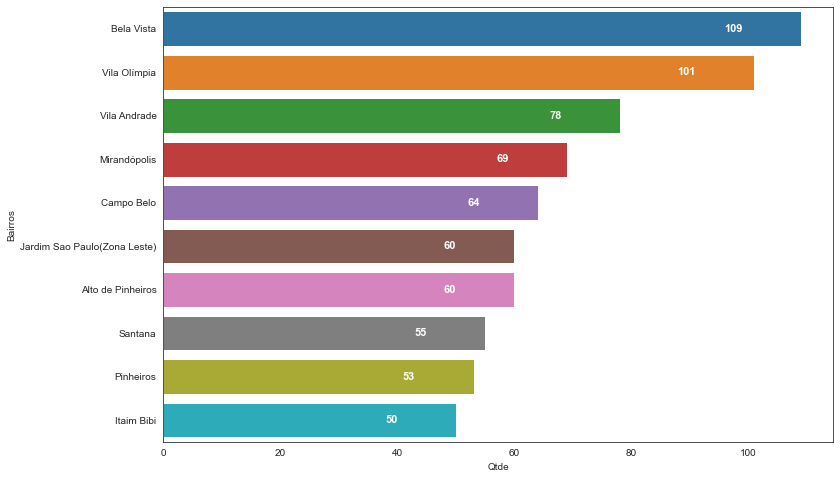

In [97]:
# sns.set(rc={'figure.figsize':(15,8)})
plt.figure(figsize=(12,8))
ax = sns.barplot(y = df_top10_aprov['Bairros'], x = df_top10_aprov['Qtde']);


# Colocando os rótulos de dados no gráfico 
for i in range(len(df_top10_aprov)): # Varre-se todo o intervalo de jogos vendidos no mundo
  ax.text(df_top10_aprov['Qtde'][i] - 10, i, 
            df_top10_aprov['Qtde'][i], fontsize=11, 
            color='white',verticalalignment='center',
          horizontalalignment='right',weight='bold')

In [98]:
df_top10_bairros = pd.DataFrame(tb1['bairro'].value_counts().head(10))
df_top10_bairros.reset_index(inplace=True)
df_top10_bairros.rename(columns={'index': 'Bairros', 'bairro': 'Qtde'}, inplace=True)

In [99]:
df_top10_bairros

,Bairros,Qtde
0,Vila Mariana,1369
1,Bela Vista,1257
2,Pinheiros,1149
3,Indianópolis,829
4,Santana,717
5,Consolação,714
6,Perdizes,703
7,Santo Amaro,702
8,Vila Andrade,689
9,Jardim Paulista,672


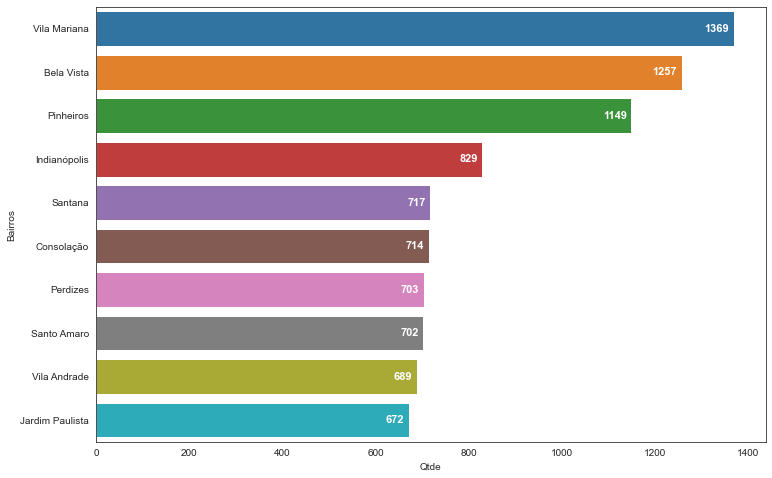

In [100]:
plt.figure(figsize=(12,8))
ax1 = sns.barplot(y = df_top10_bairros['Bairros'], x = df_top10_bairros['Qtde']);
for i in range(len(df_top10_bairros)): # Varre-se todo o intervalo de jogos vendidos no mundo
  ax1.text(df_top10_bairros['Qtde'][i] - 10, i, 
            df_top10_bairros['Qtde'][i], fontsize=11, 
            color='white',verticalalignment='center',
          horizontalalignment='right',weight='bold')

## Este trabalho está em andamento...

- Busca de conhecimentos em machine learning para criar um modelo preditivo.